In [ ]:
#|default_exp absorbance

# From reflectance to absorbance 

> It is all transparent! 

The color physics of a transparent (i.e. non-scattering) dye layer on paper is described by its spectral transmission $T = I / I_{0}$ Given the transmission of a colored layer of unit thickness, we can compute the transmission of multiple layers by simply multiplying their transmission spectra! For example, if the amount of light at a certain wavelength is halved to 50% by a single layer, then adding a second layer will reduce the amount of transmitted light to 25%.    

![Multiplying transmissions](images/optics_works_in_two_ways.svg)

In mathematical terms this behavior is described by the Lambert-Beer law. This exponential equation relates the spectral transmission $T_n$ of stack of colored sheets to the spectral absorption coefficient $K_1$ of a single layer and the thickness $n$ of the stack. 

$$ T_n = \frac{I}{I_0}= e^{-n K_{1}}$$

This equation can be rewritten to calculate the absorbance spectrum $A$ for a given dye patch from the spectral reflectance $R$ of a dye patch and the spectral reflectance of the white paper background $R_g$. 

$$ A = nK_1 = -\ln{\frac{I}{I_0}} = -\ln{\frac{R}{R_g}}$$

Conversion of reflectance spectra into absorbance spectra greatly simplifies calculations, because their shape only determined by the dye and is independent of concentration or thickness of the dye patch. Furthermore, absorbance is linear with concentration.     

In [ ]:
#|hide 
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
#|hide 
os.chdir('/home/frank/Work/Projecten/dev/iqcampy/notebooks/downloads') 

In [ ]:
data_path = 'iqcam_2021-02-03_005_4x-aquarelblauw-FL-01'

In [ ]:
from iqcampy import read_darkref, read_whiteref, read_capture, compute_reflectance 

In [ ]:
dark_meta, nms, dark_spectrum = read_darkref(data_path)
white_meta, nms, white_spectrum = read_whiteref(data_path)
capture_meta, nms, capture_cube = read_capture(data_path) 

reflectance_cube = compute_reflectance(capture_cube, dark_spectrum, white_spectrum) 
pseudo_rgb = reflectance_cube[:,:, [70, 53, 19]] # red, green, blue 

# avoid clipping by normalizing 
pseudo_rgb = pseudo_rgb / pseudo_rgb.max()

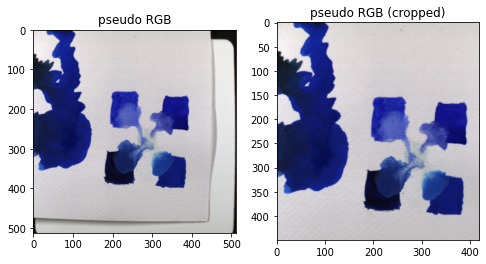

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[8, 5])
ax.imshow(pseudo_rgb) 
ax.set_title('pseudo RGB');

h, w = 450, 420

ax1.imshow(pseudo_rgb[0:h, 0:420]) 
ax1.set_title('pseudo RGB (cropped)'); 

For further computations we no longer need the white calibration tile, so let's crop to the paper area in the image first.  

In [ ]:
refl_cube = reflectance_cube[0:h, 0:w] # crop 

In [ ]:
shape = refl_cube.shape

In [ ]:
shape

(450, 420, 204)

In [ ]:
refl_table = refl_cube.reshape([-1, 204])

In [ ]:
refl_table.shape

(189000, 204)

In [ ]:
white = np.max(refl_table, axis=0)

[<matplotlib.lines.Line2D>]

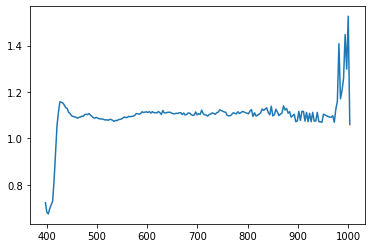

In [ ]:
fig, ax = plt.subplots()

x = np.arange(len(white))

ax.plot(nms, white)

In [ ]:
absorbance = -np.log(refl_cube / white[None, None, :])

**To be continued**